# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

## Perform API Calls

In [11]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=castro
Processing Record 2 of Set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=new%20norfolk
Processing Record 3 of Set 1 | synya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=synya
Processing Record 4 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=butaritari
Processing Record 5 of Set 1 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ancud
Processing Record 6 of Set 1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sao%20joao%20da%20barra
Processi

City not found. Skipping...
Processing Record 2 of Set 2 | urdzhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=urdzhar
City not found. Skipping...
Processing Record 3 of Set 2 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=severo-kurilsk
Processing Record 4 of Set 2 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nalut
Processing Record 5 of Set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nikolskoye
Processing Record 6 of Set 2 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hualmay
Processing Record 7 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jamestown
Processing Record 8 of S

Processing Record 5 of Set 3 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=faya
Processing Record 6 of Set 3 | katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=katangli
Processing Record 7 of Set 3 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=antofagasta
Processing Record 8 of Set 3 | tidore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tidore
City not found. Skipping...
Processing Record 9 of Set 3 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=belushya%20guba
City not found. Skipping...
Processing Record 10 of Set 3 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tasiilaq
Processing Record 11 of S

City not found. Skipping...
Processing Record 7 of Set 4 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bredasdorp
Processing Record 8 of Set 4 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vardo
Processing Record 9 of Set 4 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=amderma
City not found. Skipping...
Processing Record 10 of Set 4 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=port%20blair
Processing Record 11 of Set 4 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=attawapiskat
City not found. Skipping...
Processing Record 12 of Set 4 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&

Processing Record 9 of Set 5 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hithadhoo
Processing Record 10 of Set 5 | babu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=babu
Processing Record 11 of Set 5 | athabasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=athabasca
Processing Record 12 of Set 5 | mongoumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mongoumba
Processing Record 13 of Set 5 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bengkulu
City not found. Skipping...
Processing Record 14 of Set 5 | ikorodu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ikorodu
Processing Record 15 of Set 5 | carutapera
http://api.openw

Processing Record 11 of Set 6 | doctor juan manuel frutos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=doctor%20juan%20manuel%20frutos
Processing Record 12 of Set 6 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=coahuayana
Processing Record 13 of Set 6 | atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=atherton
Processing Record 14 of Set 6 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=provideniya
Processing Record 15 of Set 6 | serebryansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=serebryansk
Processing Record 16 of Set 6 | utiroa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=utiroa
City not found. Skipping...
Pr

Processing Record 14 of Set 7 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fort%20nelson
Processing Record 15 of Set 7 | soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=soyo
Processing Record 16 of Set 7 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lorengau
Processing Record 17 of Set 7 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nanortalik
Processing Record 18 of Set 7 | mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mogadishu
Processing Record 19 of Set 7 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint%20george
Processing Record 20 of Set 7 | yarim
http://api.openweathermap.or

Processing Record 17 of Set 8 | narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=narasannapeta
Processing Record 18 of Set 8 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lata
Processing Record 19 of Set 8 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=noumea
Processing Record 20 of Set 8 | biloela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=biloela
Processing Record 21 of Set 8 | jiayuguan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jiayuguan
Processing Record 22 of Set 8 | umea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=umea
Processing Record 23 of Set 8 | bokspits
http://api.openweathermap.org/data/2.5/weather?unit

City not found. Skipping...
Processing Record 19 of Set 9 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=altay
Processing Record 20 of Set 9 | uberlandia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=uberlandia
Processing Record 21 of Set 9 | dien bien
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dien%20bien
City not found. Skipping...
Processing Record 22 of Set 9 | maghama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=maghama
City not found. Skipping...
Processing Record 23 of Set 9 | abu jubayhah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=abu%20jubayhah
City not found. Skipping...
Processing Record 24 of Set 9 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 21 of Set 10 | sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sayyan
Processing Record 22 of Set 10 | nguiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nguiu
City not found. Skipping...
Processing Record 23 of Set 10 | houston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=houston
Processing Record 24 of Set 10 | burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=burnie
Processing Record 25 of Set 10 | liverpool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=liverpool
Processing Record 26 of Set 10 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vanavara
Processing Record 27 of Set 10 | dikson
http://api.openweather

Processing Record 24 of Set 11 | korsakov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=korsakov
Processing Record 25 of Set 11 | ostersund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ostersund
Processing Record 26 of Set 11 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sioux%20lookout
Processing Record 27 of Set 11 | zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zhanaozen
Processing Record 28 of Set 11 | torres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=torres
Processing Record 29 of Set 11 | itamaraca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=itamaraca
Processing Record 30 of Set 11 | oranjestad
http://api.openwea

Processing Record 27 of Set 12 | denizli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=denizli
Processing Record 28 of Set 12 | killybegs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=killybegs
Processing Record 29 of Set 12 | gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=gizo
Processing Record 30 of Set 12 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=komsomolskiy
Processing Record 31 of Set 12 | marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=marrakesh
Processing Record 32 of Set 12 | bafoulabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bafoulabe
Processing Record 33 of Set 12 | severnoye
http://api.openweathermap.org

In [12]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          520
Cloudiness    520
Country       520
Date          520
Humidity      520
Lat           520
Lng           520
Max Temp      520
Wind Speed    520
dtype: int64

In [13]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,castro,20,CL,1515963505,57,-42.48,-73.76,66.13,8.01
1,new norfolk,40,AU,1515960000,67,-42.78,147.06,60.80,9.17
2,synya,88,RU,1515963507,96,65.37,58.04,29.18,8.79
3,butaritari,88,KI,1515963507,99,3.07,172.79,83.86,21.32
4,ancud,12,CL,1515963508,56,-41.87,-73.83,69.19,6.78


## Latitude vs Temperature Plot

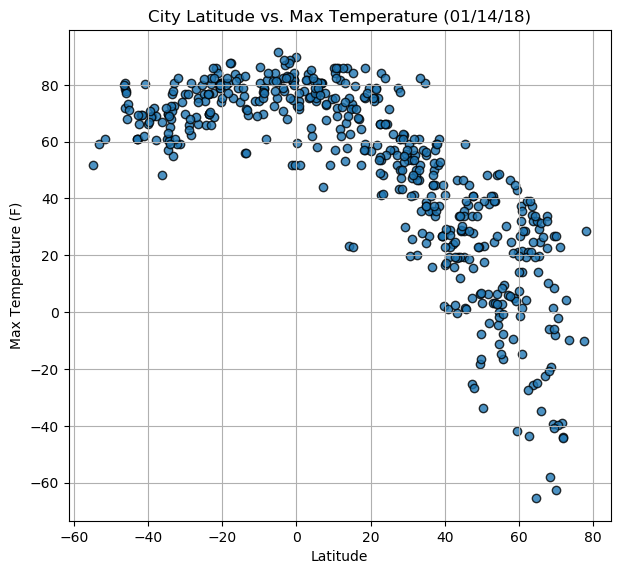

In [35]:
# Build scatter plot for latitude vs temperature
figure = plt.figure()
figure.set_dpi(100)
figure.set_size_inches(7, 6.5)


plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
figure.savefig("output_data/Fig1.svg")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

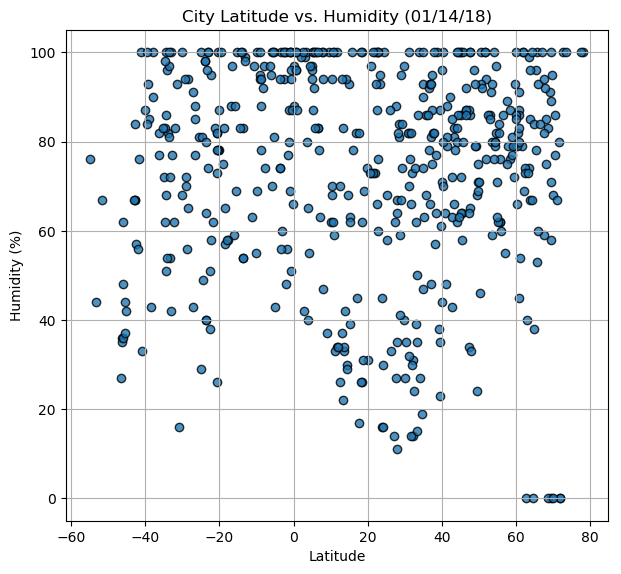

In [34]:
# Build the scatter plots for each city types
figure = plt.figure()
figure.set_dpi(100)
figure.set_size_inches(7, 6.5)

plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
figure.savefig("output_data/Fig2.svg")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

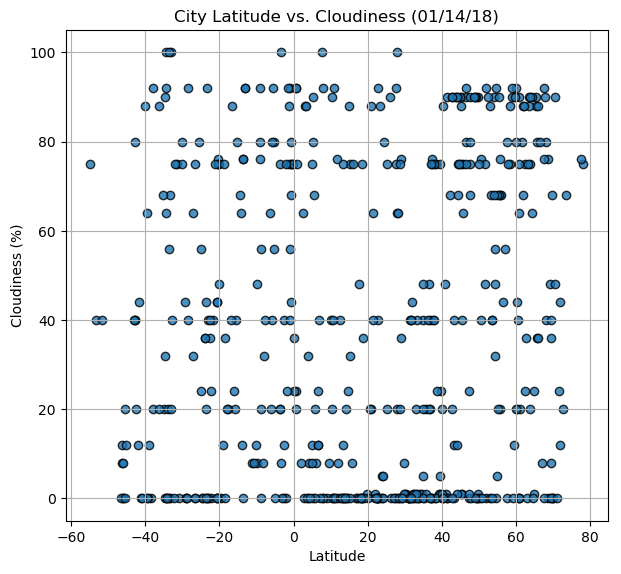

In [33]:
# Build the scatter plots for each city types
figure = plt.figure()
figure.set_dpi(100)
figure.set_size_inches(7, 6.5)



plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
figure.savefig("output_data/Fig3.svg")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

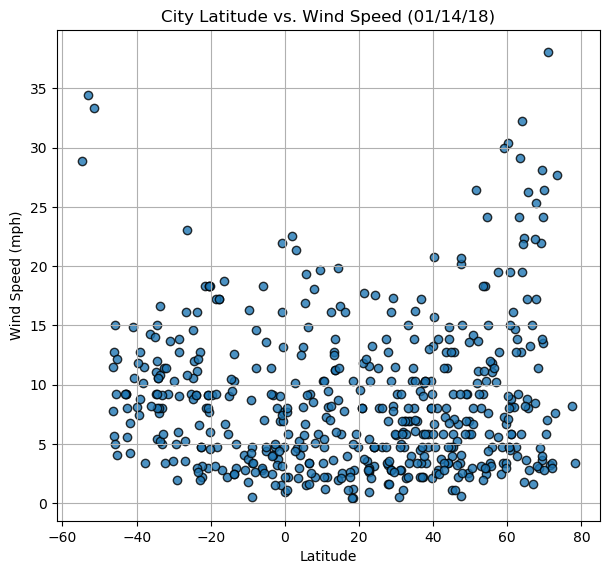

In [32]:
# Build the scatter plots for each city types

figure = plt.figure()
figure.set_dpi(100)
figure.set_size_inches(7, 6.5)

plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
figure.savefig("output_data/Fig4.svg")

# Show plot
plt.show()

In [18]:
figure = plt.figure()
dpi = figure.get_dpi()
size = figure.get_size_inches()
print ("DPI: %i" % dpi)
print ("Size in inches: %i x %i" % (size[0], size[1]))
print ("Pixels: %i x %i" % (dpi * size[0], dpi * size[1]))

DPI: 72
Size in inches: 6 x 4
Pixels: 432 x 288


In [19]:
figure.set_dpi(100)
figure.set_size_inches(7, 6.5)
figure.set_tight_layout(True)